In [3]:
import numpy as np
import cv2
import os
import random
import matplotlib.pyplot as plt
import pickle
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import time

In [5]:
DIRECTORY = r'sample_data/'
CATEGORIES = ['cats','dogs']

In [6]:
IMG_SIZE = 200

data = []

for category in CATEGORIES:
    folder = os.path.join(DIRECTORY, category)
    label = CATEGORIES.index(category)
    for img in os.listdir(folder):
        img_path = os.path.join(folder, img)
        img_arr = cv2.imread(img_path)
        img_arr = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
        data.append([img_arr, label])

In [7]:
len(data)

3933

In [8]:
random.shuffle(data)

In [9]:
x = []
y = []

for features, labels in data:
    x.append(features)
    y.append(labels)

In [10]:
x = np.array(x)
y = np.array(y)

In [11]:
pickle.dump(x, open('x.pkl', 'wb'))
pickle.dump(y, open('y.pkl', 'wb'))

In [12]:
x = pickle.load(open('x.pkl', 'rb'))
y = pickle.load(open('y.pkl', 'rb'))

In [13]:
x.shape

(3933, 200, 200, 3)

In [14]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [15]:
model = Sequential()

model.add(Conv2D(64, (3,3), activation = 'relu' ))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation = 'relu' ))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(128, input_shape = x.shape[1:], activation = 'relu'))

model.add(Dense(2, activation = 'softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x, y, epochs=2, validation_split=0.1)

Epoch 1/2
111/111 ━━━━━━━━━━━━━━━━━━━━ 705s 6s/step - accuracy: 0.8270 - loss: 0.5506 - val_accuracy: 0.7868 - val_loss: 0.5411
Epoch 2/2
108/111 ━━━━━━━━━━━━━━━━━━━━ 12s 4s/step - accuracy: 0.8262 - loss: 0.3969

In [19]:
model.save('sample_data/model.h5')

In [20]:
# Import necessary libraries
import numpy as np
import cv2
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import os

In [23]:
# Load the trained model
model = load_model('sample_data/model.h5')  # Replace with your model's path

In [24]:
# Define image size and categories
IMG_SIZE = 200
CATEGORIES = ['cat', 'dog']

def prepare_image(filepath):
    """
    Preprocess the input image for prediction.
    """
    img_array = cv2.imread(filepath)  # Load the image
    img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # Resize the image
    img_array = img_array / 255.0  # Normalize the image
    img_array = img_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)  # Reshape for the model
    return img_array


In [25]:
def predict_image(filepath):
    """
    Predict whether the image is of a cat or a dog.
    """
    processed_image = prepare_image(filepath)
    prediction = model.predict(processed_image)  # Predict using the model
    predicted_class = CATEGORIES[np.argmax(prediction)]
    confidence = np.max(prediction) * 100  # Get confidence percentage
    return predicted_class, confidence

In [31]:
# Test the prediction with a sample image
sample_image_path = 'sample_data/test/image1.jpg'  # Replace with your test image path
predicted_class, confidence = predict_image(sample_image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


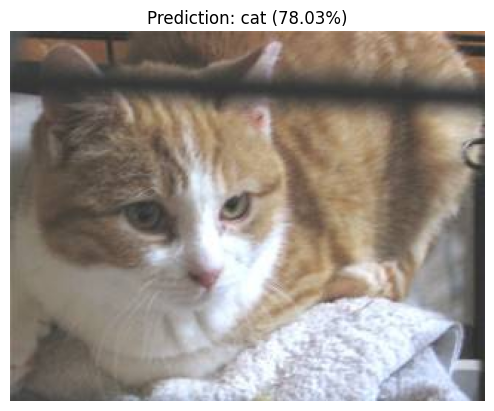

In [32]:
# Display the result
plt.imshow(cv2.cvtColor(cv2.imread(sample_image_path), cv2.COLOR_BGR2RGB))
plt.title(f"Prediction: {predicted_class} ({confidence:.2f}%)")
plt.axis('off')
plt.show()